<a href="https://colab.research.google.com/github/AmiraliEsi83/VGG19-VGG16-project/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from keras.applications.resnet import ResNet50
model = ResNet50(weights='imagenet')
print(model.summary())

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

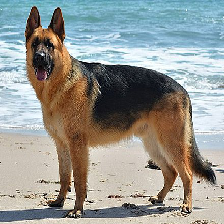

In [38]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input,decode_predictions
import numpy as np

img_path = 'dogg.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [39]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [40]:
x

array([[[[101., 167., 183.],
         [108., 174., 190.],
         [107., 173., 189.],
         ...,
         [103., 159., 182.],
         [118., 172., 196.],
         [107., 161., 185.]],

        [[106., 172., 188.],
         [103., 169., 185.],
         [102., 168., 184.],
         ...,
         [120., 176., 199.],
         [116., 172., 195.],
         [124., 180., 203.]],

        [[ 95., 161., 177.],
         [ 95., 161., 177.],
         [ 88., 154., 170.],
         ...,
         [122., 183., 204.],
         [120., 178., 200.],
         [120., 178., 200.]],

        ...,

        [[ 93.,  99., 111.],
         [ 87.,  93., 105.],
         [ 79.,  85.,  97.],
         ...,
         [207., 201., 189.],
         [205., 199., 187.],
         [201., 195., 183.]],

        [[221., 223., 212.],
         [213., 215., 204.],
         [211., 213., 202.],
         ...,
         [214., 208., 196.],
         [203., 197., 185.],
         [211., 205., 193.]],

        [[204., 198., 182.],
       

In [41]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

1/1 [==============================] - 0s 221ms/step


In [42]:
p


[[('n02106662', 'German_shepherd', 0.99959105),
  ('n02105162', 'malinois', 0.0001782742),
  ('n02105251', 'briard', 6.101165e-05),
  ('n03803284', 'muzzle', 3.5866764e-05),
  ('n02105056', 'groenendael', 3.1000454e-05)]]